In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sen=pd.read_csv('senado.csv')
cam=pd.read_csv('camara.csv')
pls=np.unique(sen.partido)
plc=np.unique(cam.partido)

In [3]:
abstp=pd.read_csv('participacion.csv')
absts=abstp[abstp.votacion=='senado']
abstc=abstp[abstp.votacion=='camara']
dep=np.unique(abstp.departamento)

In [4]:
vtfs=[]
dabs=[]
vtts=[]
pars=[]
deps=[]
for p in pls:
    for i in dep:
        ds=sen[sen.departamento==i]
        ads=absts[absts.departamento==i]
        dabs+=[100*(1-ads.votantes.sum()/ads.habilitados.sum())]
        vtfs+=[100*(ds.candidato_votos[ds.partido==p]).sum()/(ads.votantes-ads.votos_no_marcados).sum()]
        vtts+=[(ds.candidato_votos[ds.partido==p]).sum()]
        pars+=[p]
        deps+=[i]


In [5]:
d_s = {'Departamento': deps, 'Abstención - S (%)': dabs, 'Votos Totales - S':vtts, 'Fracción de Votos - S (%)':vtfs,'Partido':pars}
df_s = pd.DataFrame(data=d_s)

In [40]:
df1=df_s[df_s['Departamento']!='Consulados']

In [7]:
plis=['coalición lista de la decencia (asi,up,mais)',
       'partido alianza verde',
       'partido cambio radical', 'partido centro democrático',
       'partido conservador colombiano',
       'partido liberal colombiano', 
       'partido polo democrático alternativo', 'partido político mira',
       'partido social de unidad nacional partido de la u',]

In [41]:
fil1=df1.Partido=='votos en blanco'
for i in plis:
    fil1|=df1.Partido==i
df1=df1[fil1]

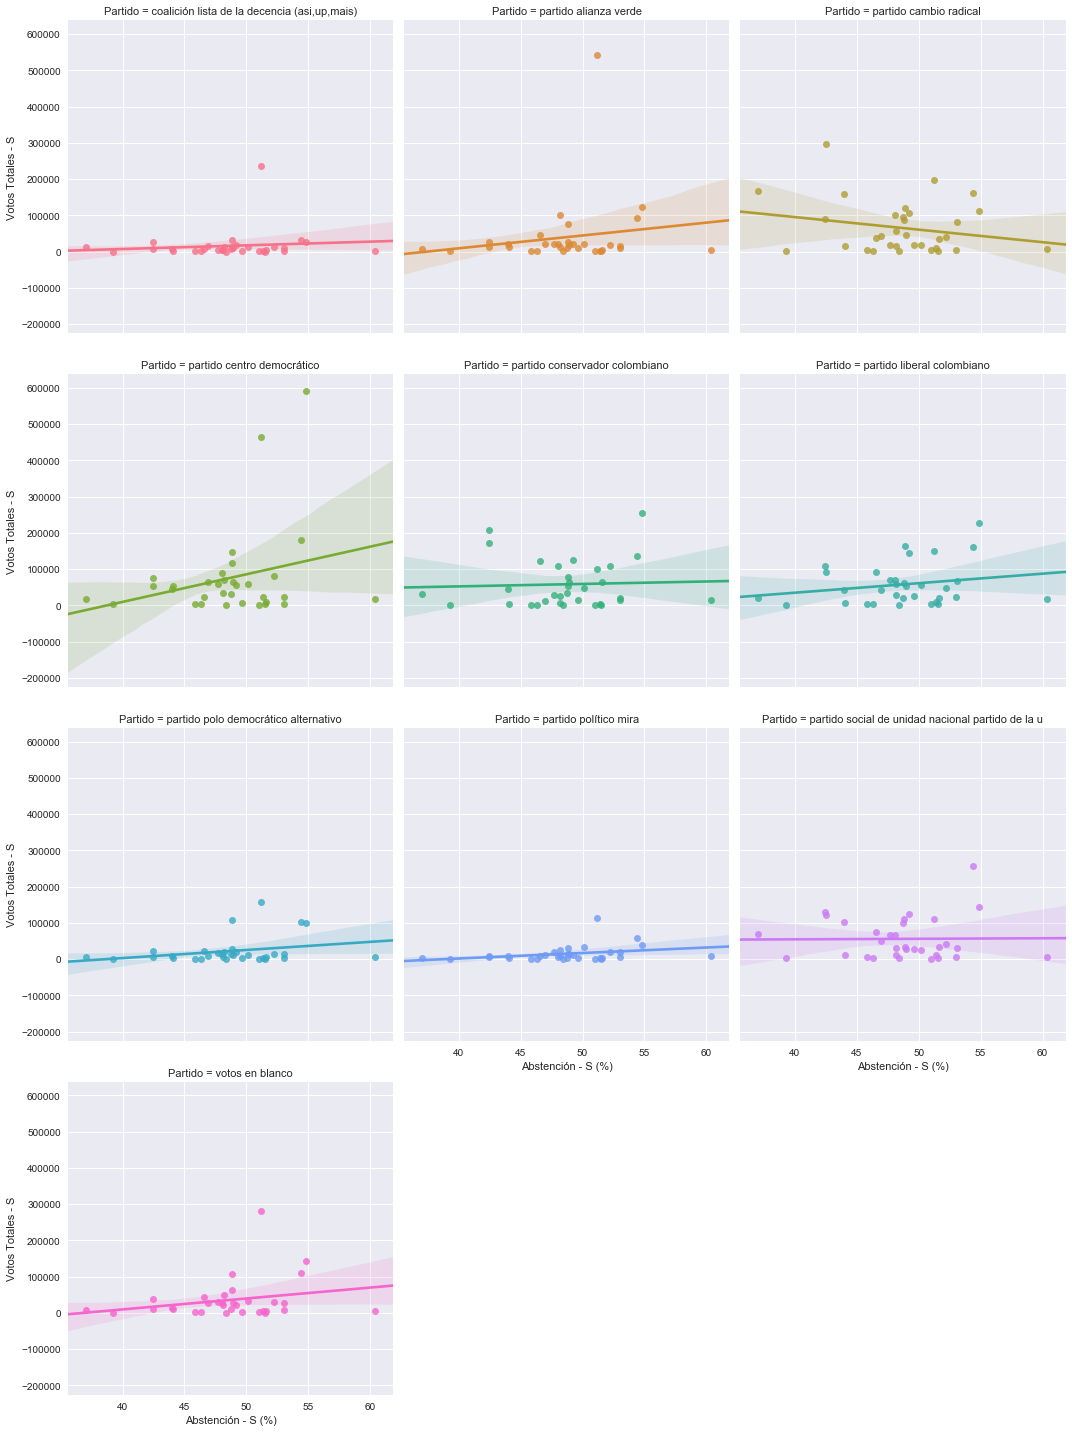

In [9]:
sns.lmplot(x='Abstención - S (%)',y='Votos Totales - S',hue='Partido',col='Partido',data=df1,col_wrap=3)

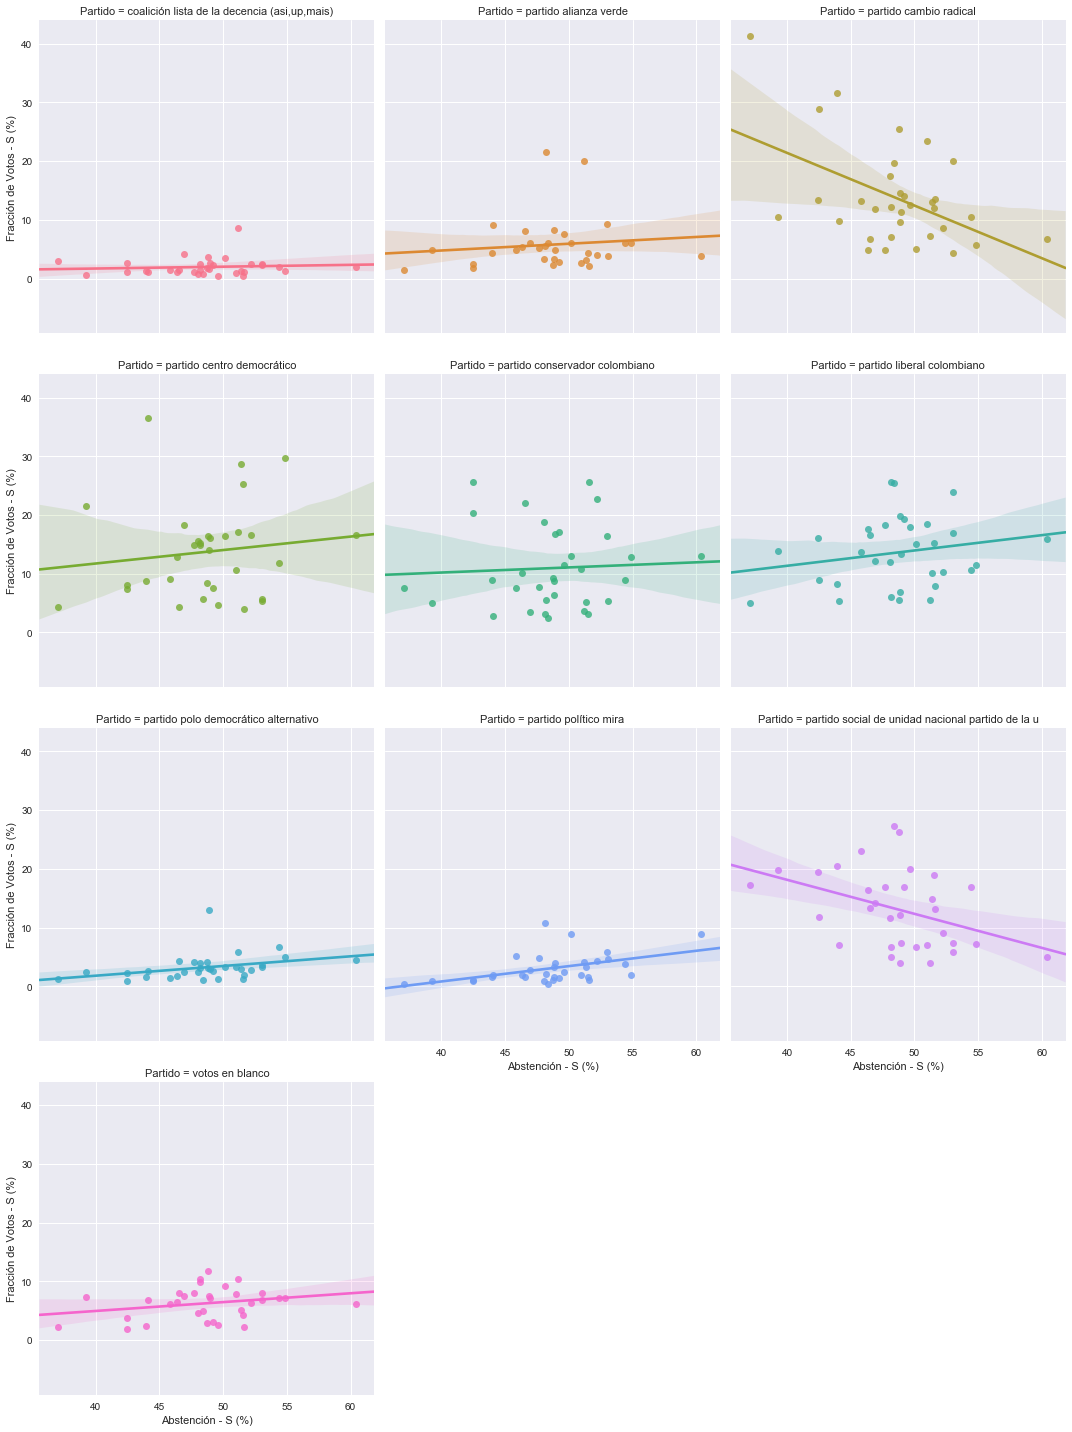

In [10]:
sns.lmplot(x='Abstención - S (%)',y='Fracción de Votos - S (%)',hue='Partido',col='Partido',data=df1,col_wrap=3)

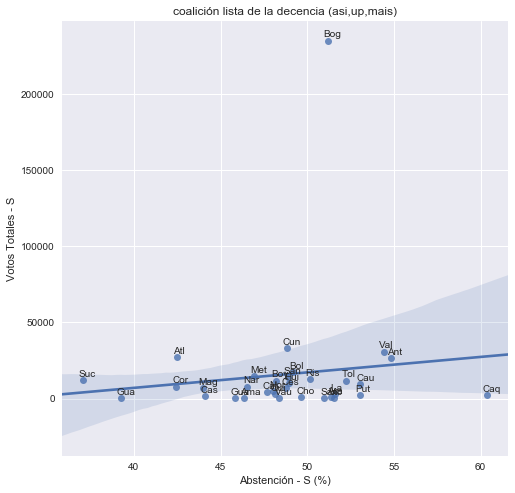

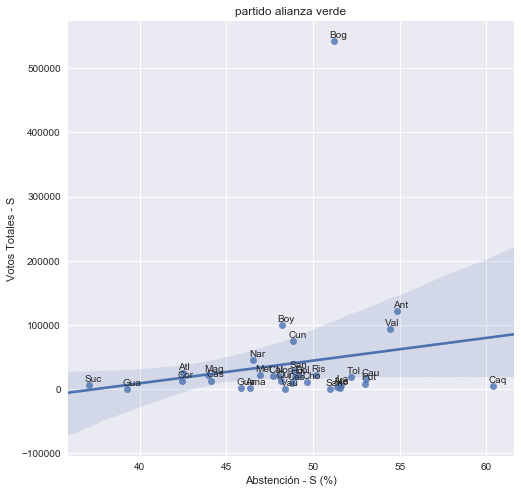

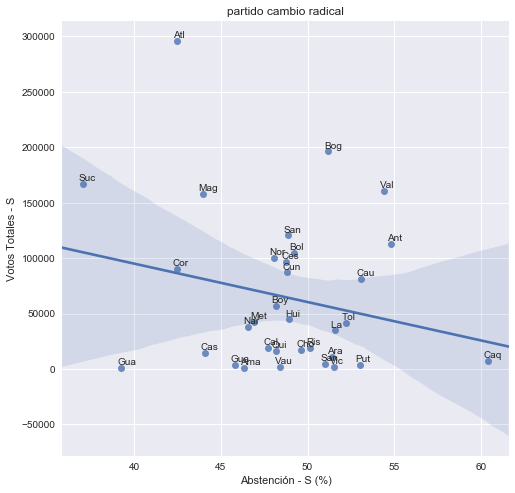

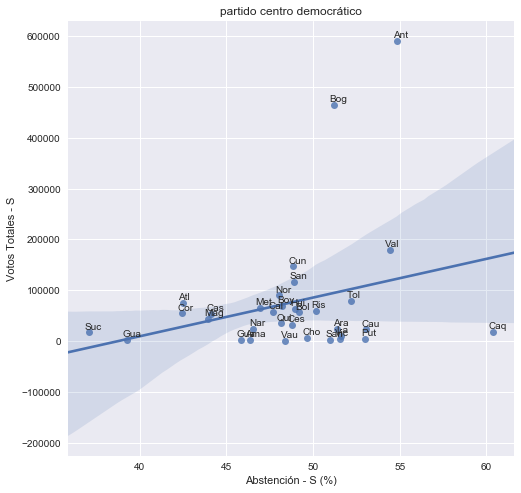

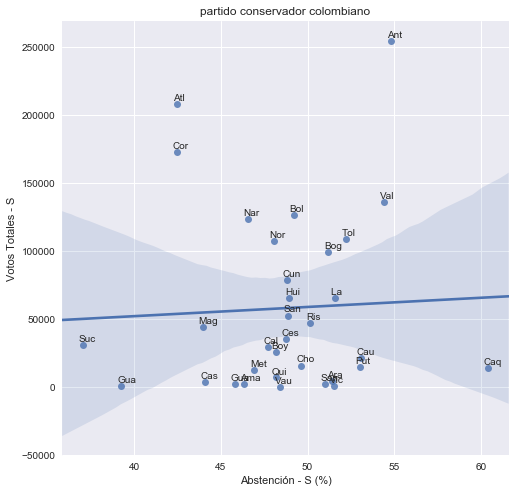

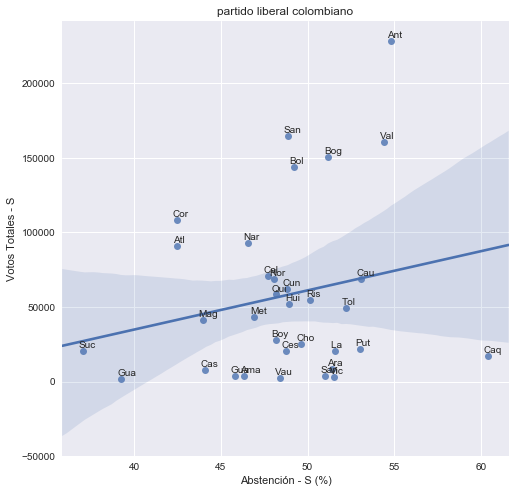

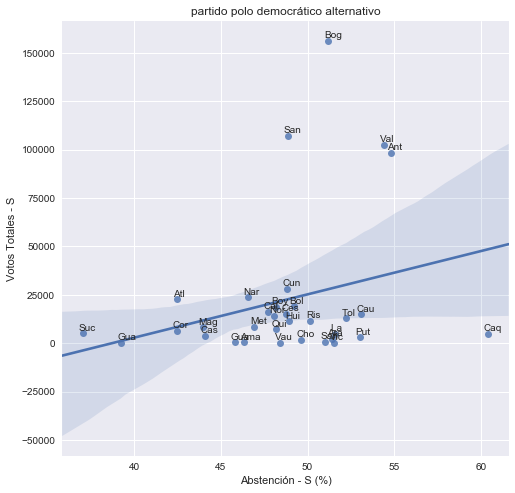

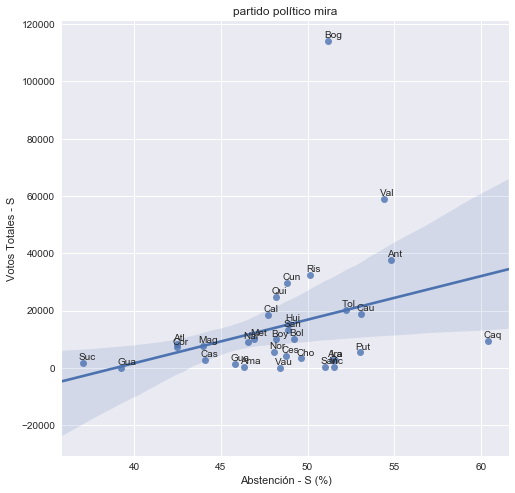

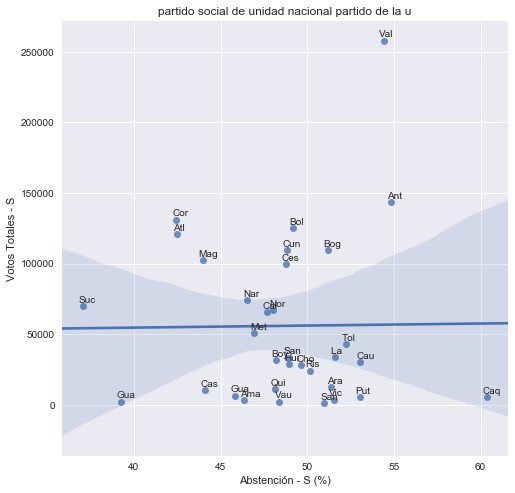

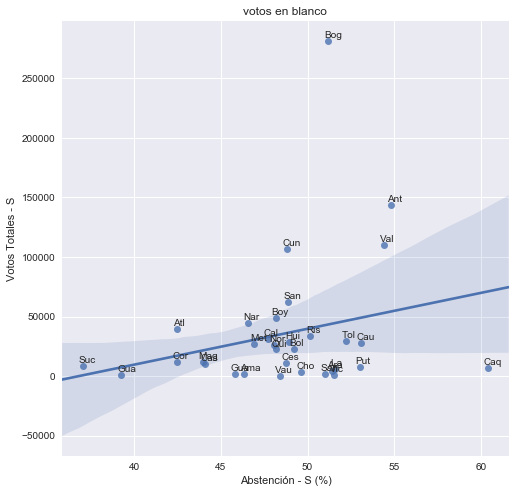

In [11]:
for k in np.unique(df1['Partido']):
    dfsel=df1[df1['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - S (%)',y='Votos Totales - S',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - S (%)'].iloc[i]-0.25,dfsel['Votos Totales - S'].iloc[i]+0.01*dfsel['Votos Totales - S'].max(),txt[0:3])
    ax.set_title(k)

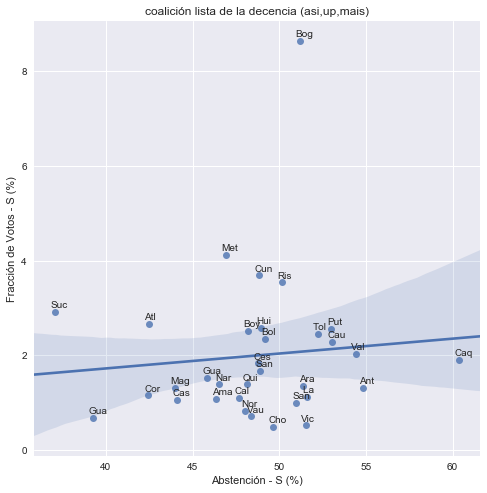

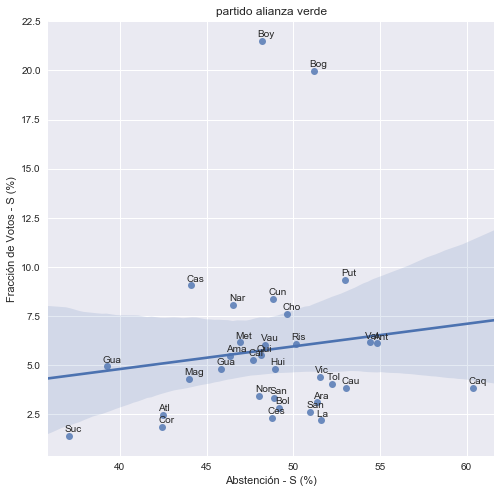

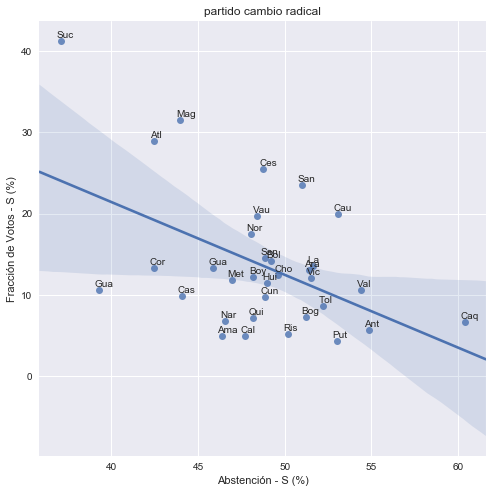

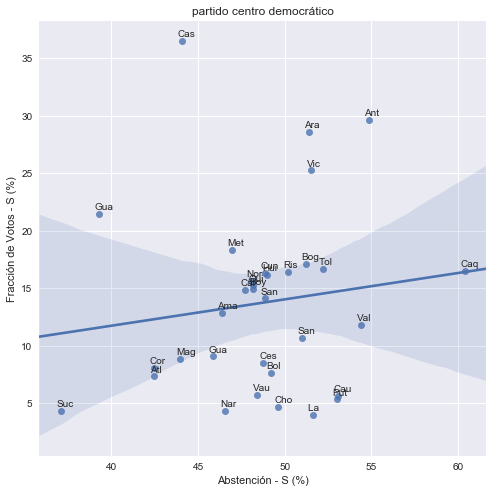

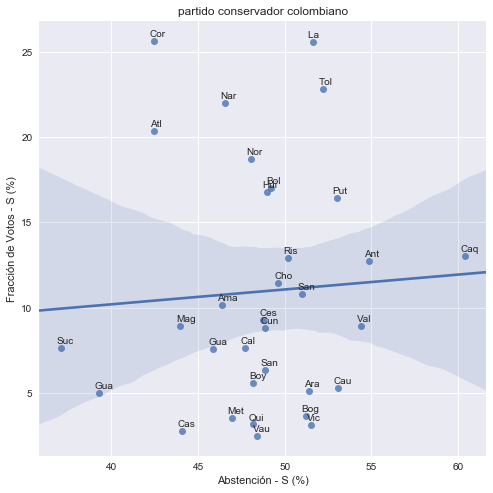

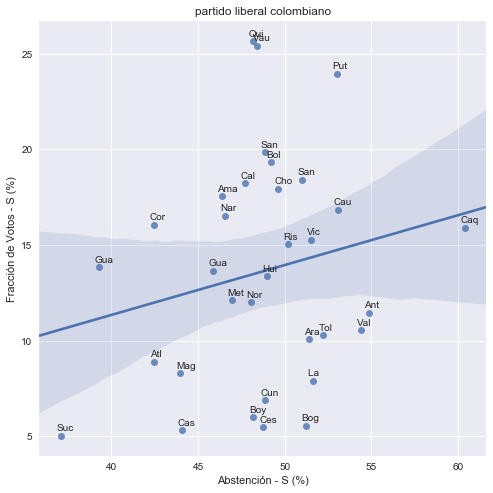

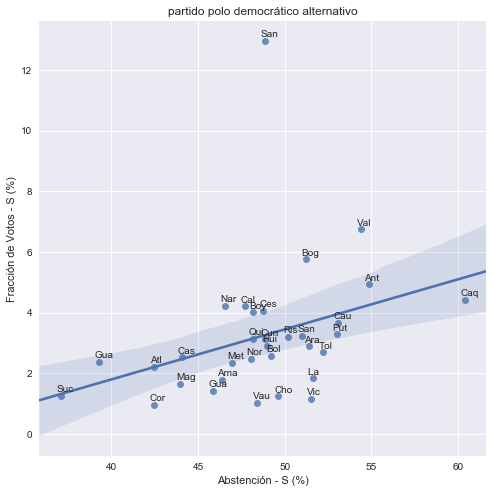

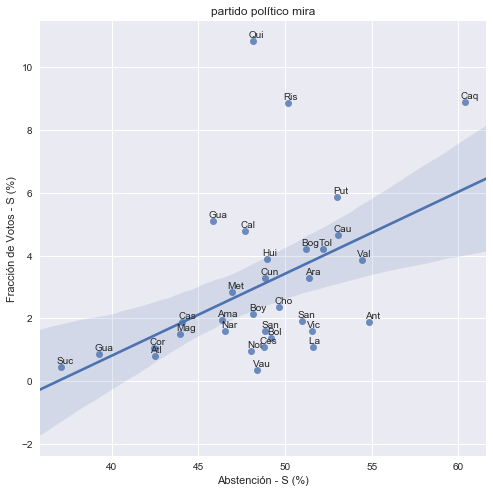

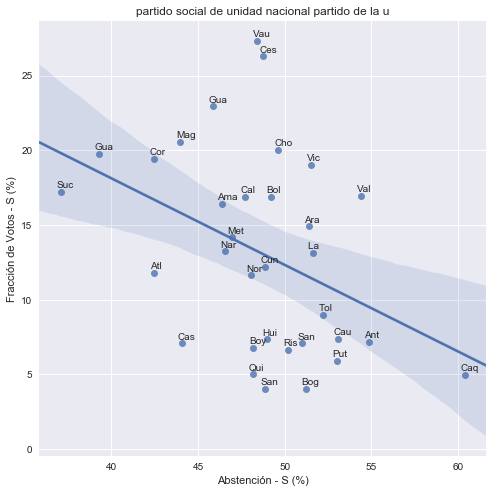

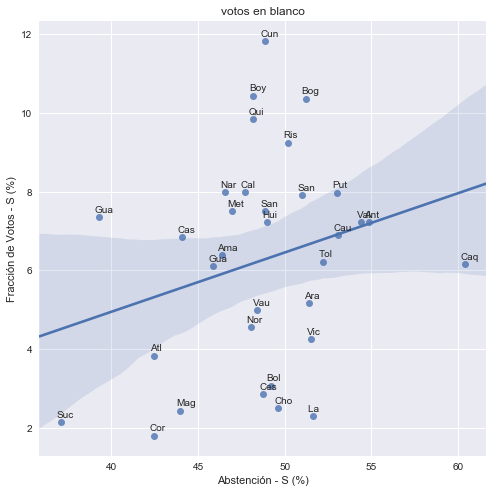

In [12]:
for k in np.unique(df1['Partido']):
    dfsel=df1[df1['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - S (%)',y='Fracción de Votos - S (%)',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - S (%)'].iloc[i]-0.25,dfsel['Fracción de Votos - S (%)'].iloc[i]+0.01*dfsel['Fracción de Votos - S (%)'].max(),txt[0:3])
    ax.set_title(k)

In [29]:
vtfc=[]
dabc=[]
vttc=[]
parc=[]
depc=[]
for p in plc:
    for i in dep:
        dc=cam[cam.departamento==i]
        adc=abstc[abstc.departamento==i]
        dabc+=[100*(1-adc.votantes.sum()/adc.habilitados.sum())]
        vtfc+=[100*(dc.candidato_votos[dc.partido==p]).sum()/(adc.votantes-adc.votos_no_marcados).sum()]
        vttc+=[(dc.candidato_votos[dc.partido==p]).sum()]
        parc+=[p]
        depc+=[i]

In [30]:
d_c = {'Departamento': depc, 'Abstención - C (%)': dabc, 'Votos Totales - C':vttc, 'Fracción de Votos - C (%)':vtfc,'Partido':parc}
df_c = pd.DataFrame(data=d_c)

In [42]:
df2=df_c[df_c['Departamento']!='Consulados']

In [43]:
plic=['coalición alternativa santandereana as',
      'coalición lista de la decencia (asi,up,mais)',
      'g.s.c. colombia justa libres',
      'movimiento alternativo indígena y social - mais',
      'coalición alternativa santandereana as',
      'partido alianza verde',
       'partido cambio radical', 'partido centro democrático',
       'partido conservador colombiano','partido liberal colombiano', 'partido opción ciudadana',
       'partido polo democrático alternativo', 'partido político mira',
       'partido social de unidad nacional partido de la u']

In [44]:
fil2=df2.Partido=='votos en blanco'
for i in plic:
    fil2|=df2.Partido==i
df2=df2[fil2]

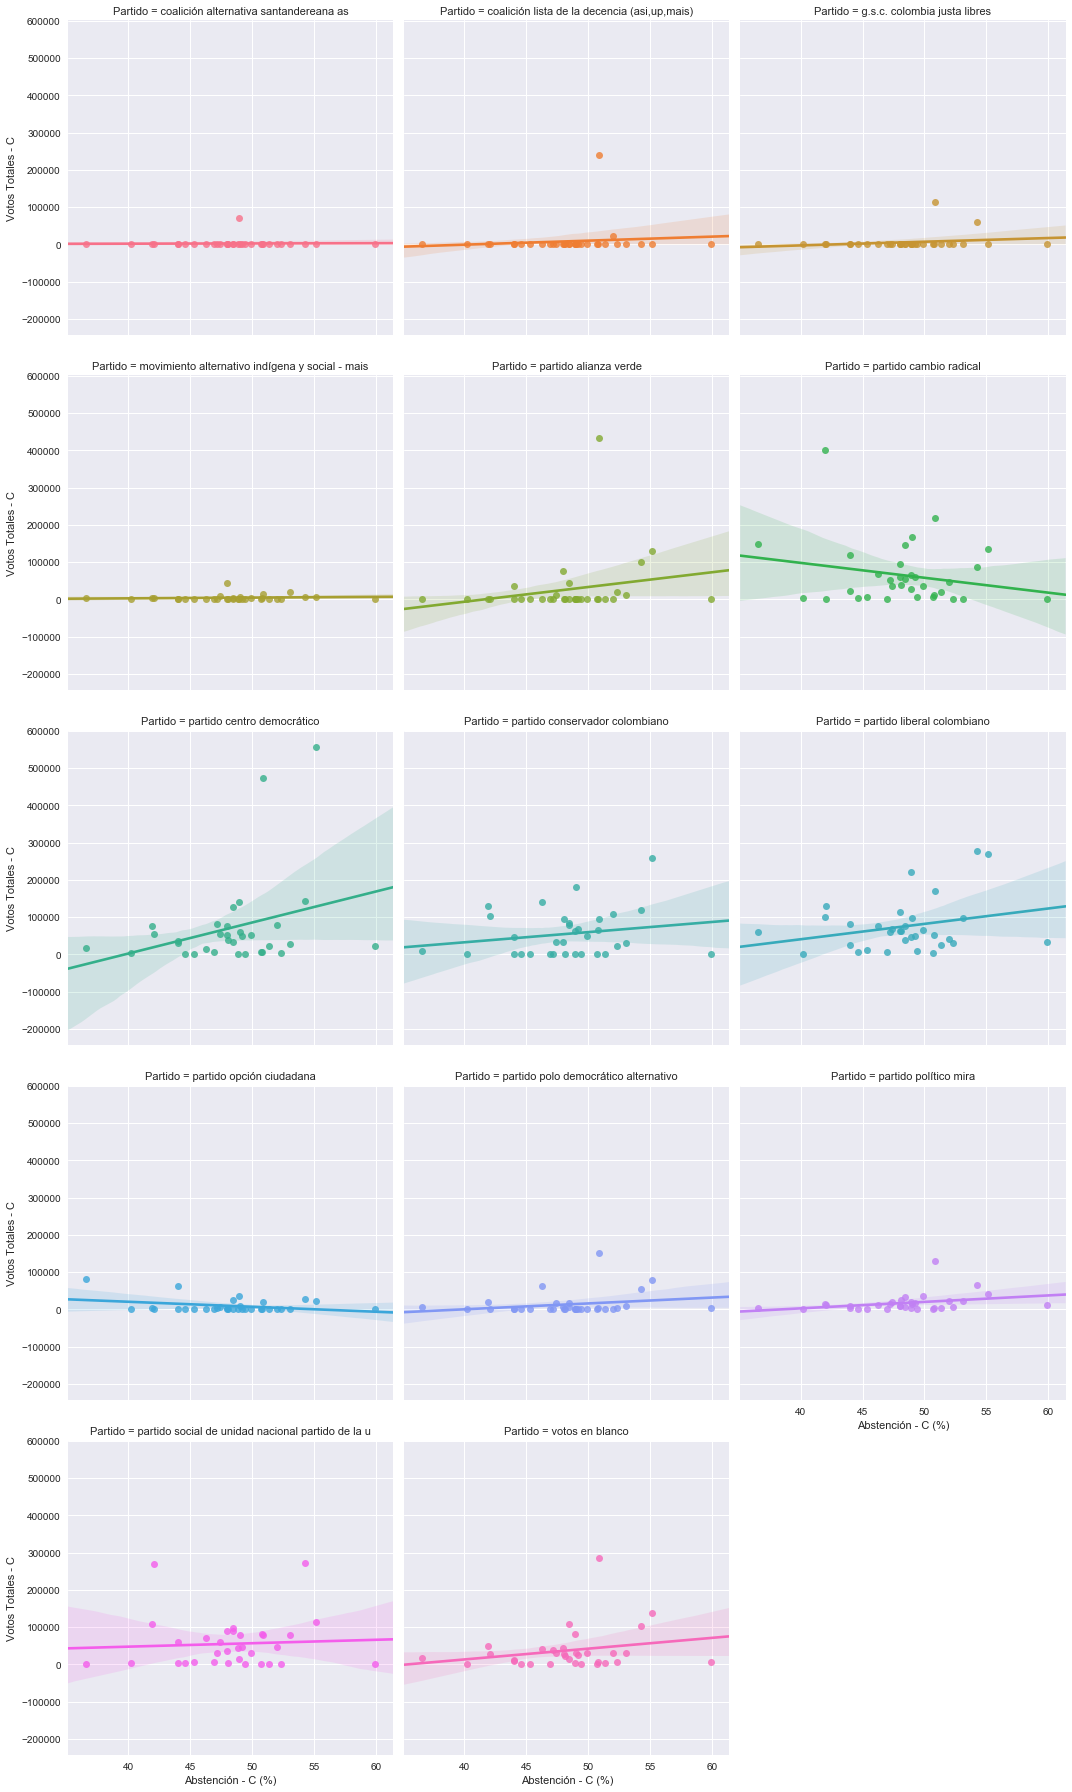

In [45]:
sns.lmplot(x='Abstención - C (%)',y='Votos Totales - C',hue='Partido',col='Partido',data=df2,col_wrap=3)

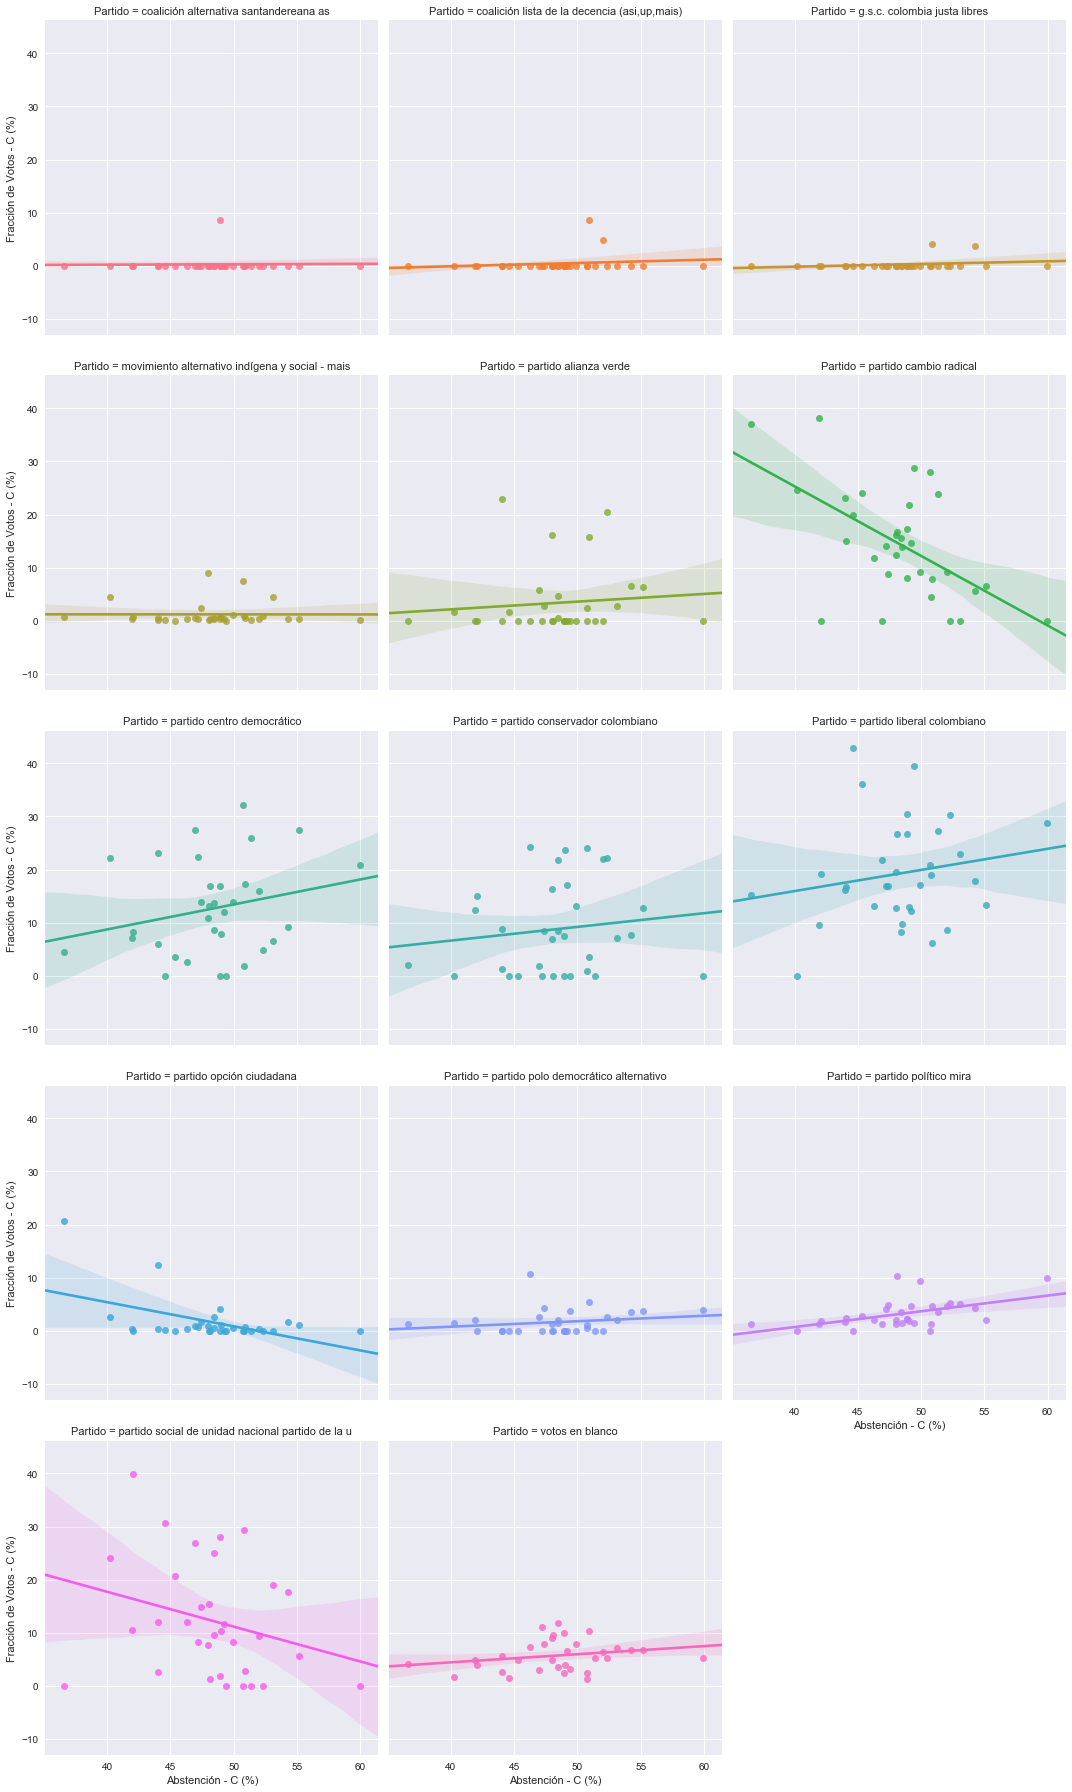

In [46]:
sns.lmplot(x='Abstención - C (%)',y='Fracción de Votos - C (%)',hue='Partido',col='Partido',data=df2,col_wrap=3)

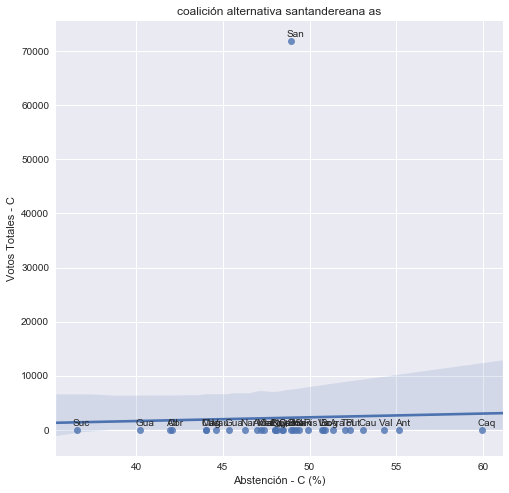

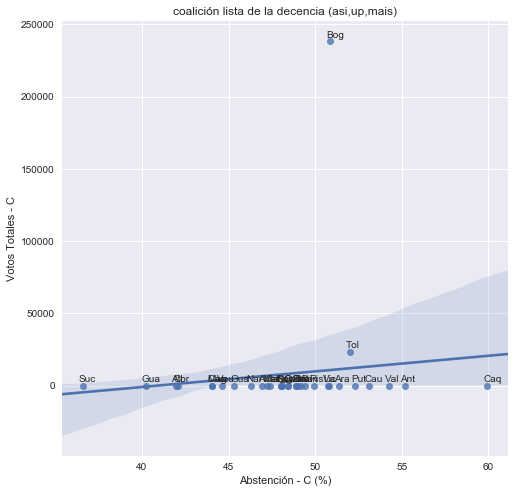

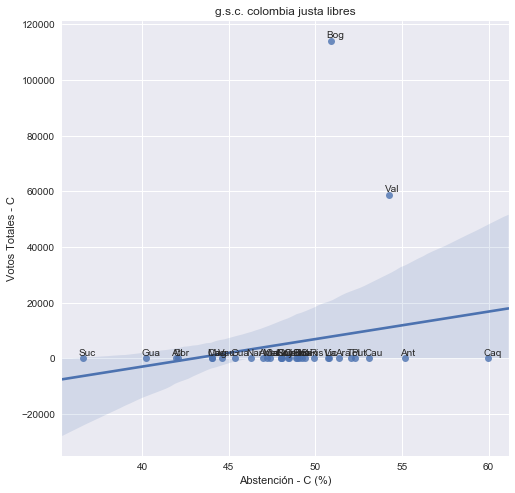

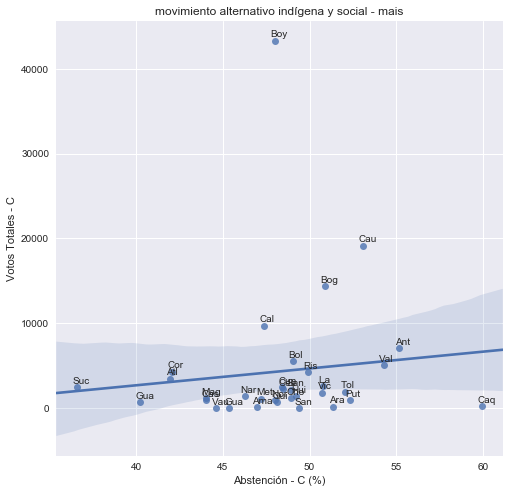

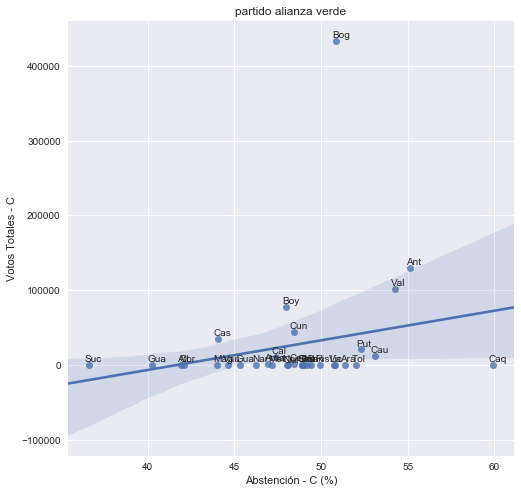

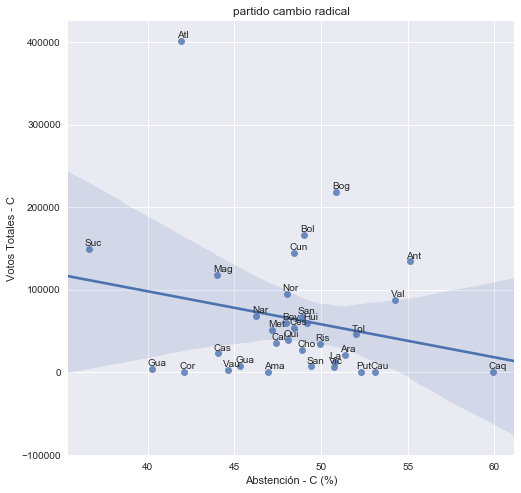

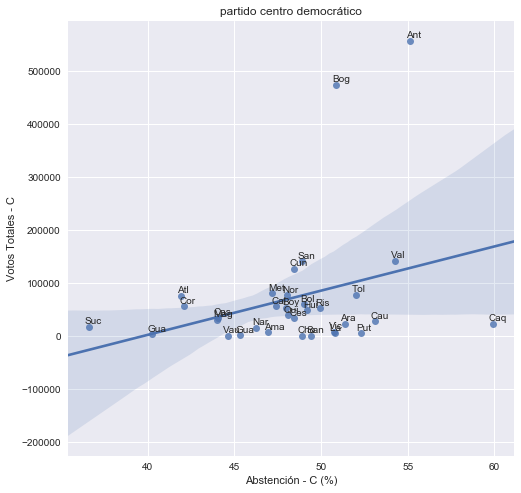

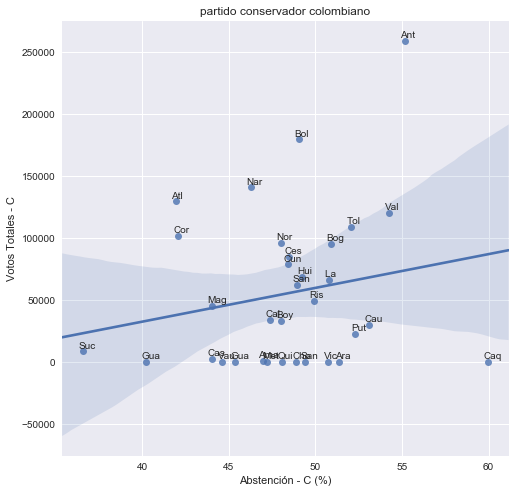

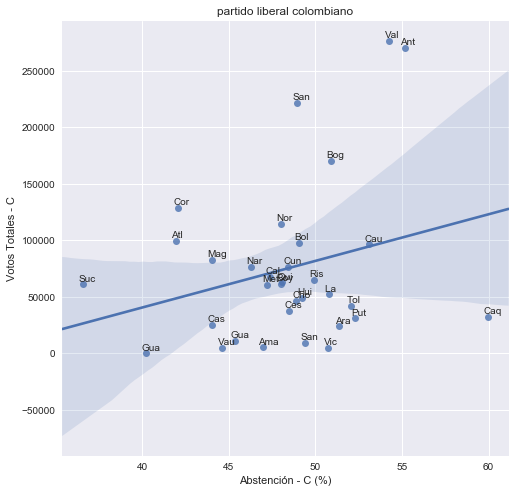

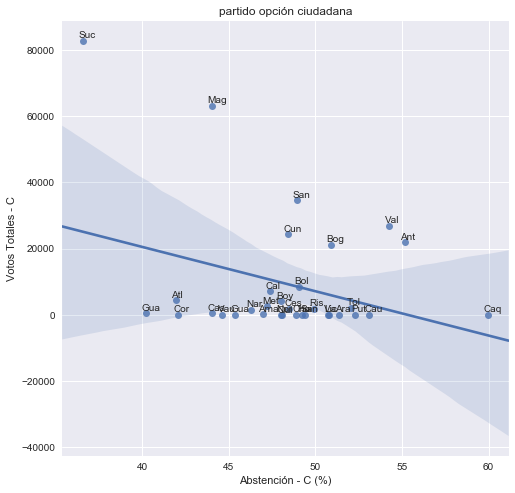

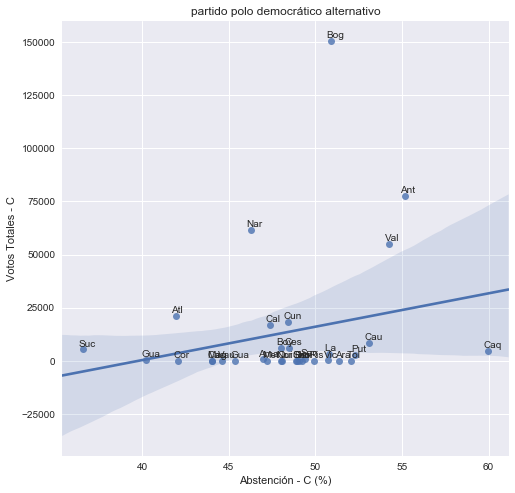

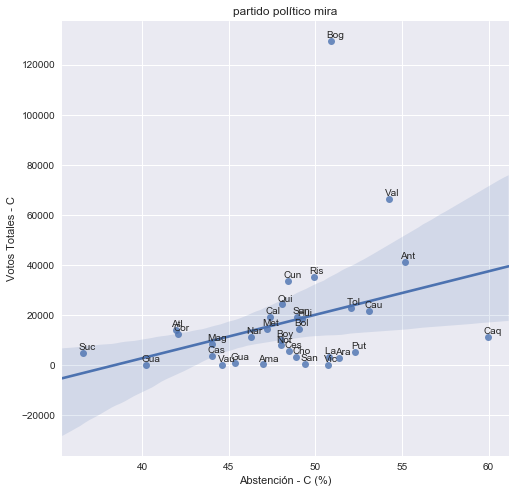

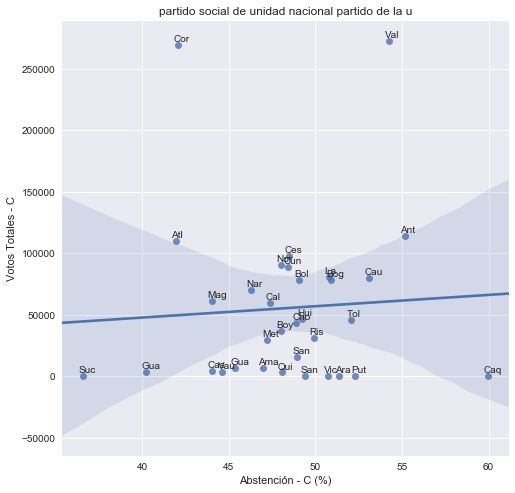

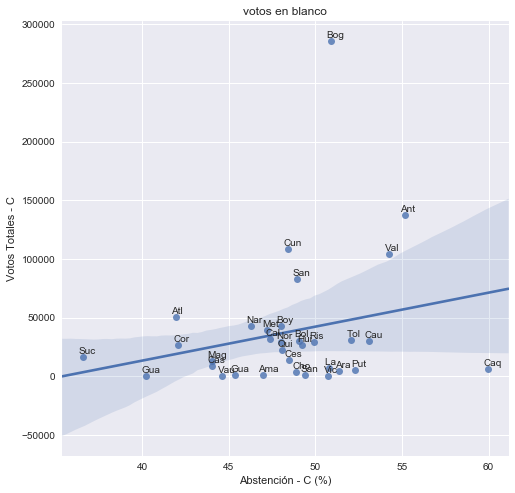

In [47]:
for k in np.unique(df2['Partido']):
    dfsel=df2[df2['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - C (%)',y='Votos Totales - C',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - C (%)'].iloc[i]-0.25,dfsel['Votos Totales - C'].iloc[i]+0.01*dfsel['Votos Totales - C'].max(),txt[0:3])
    ax.set_title(k)

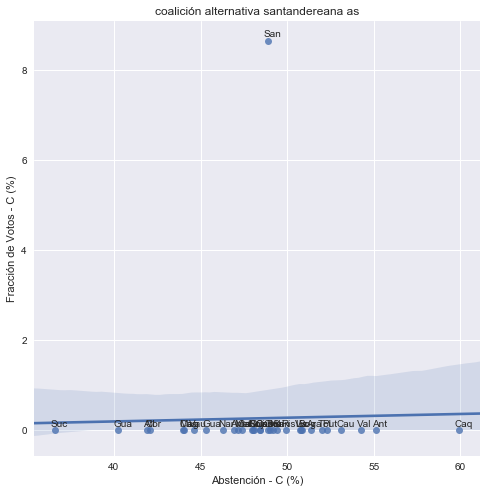

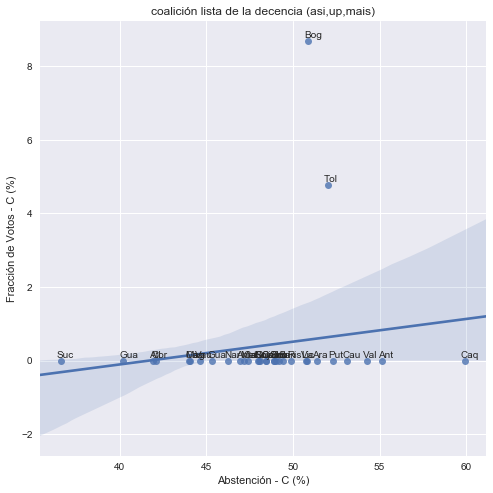

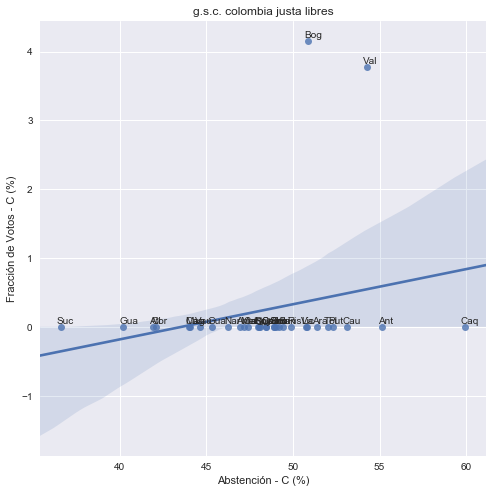

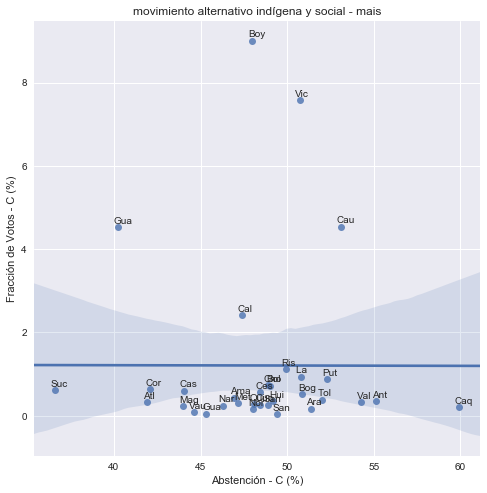

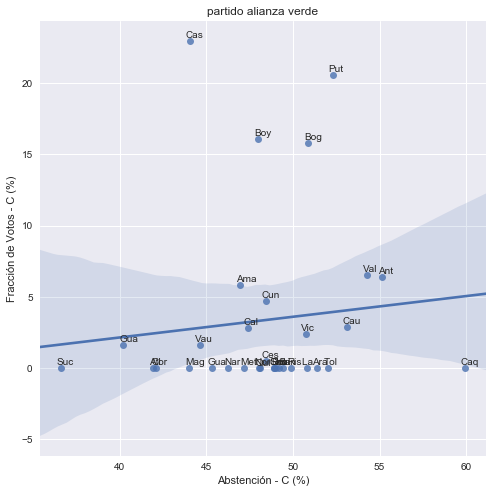

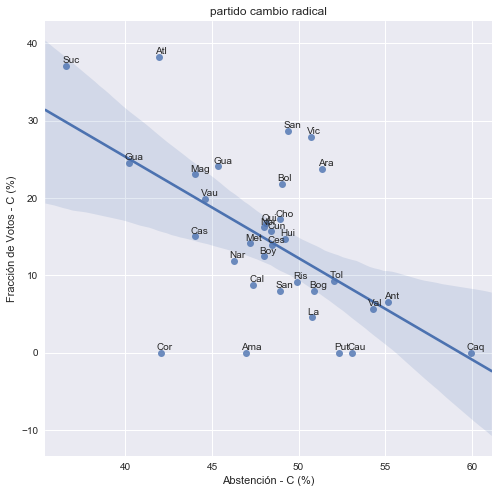

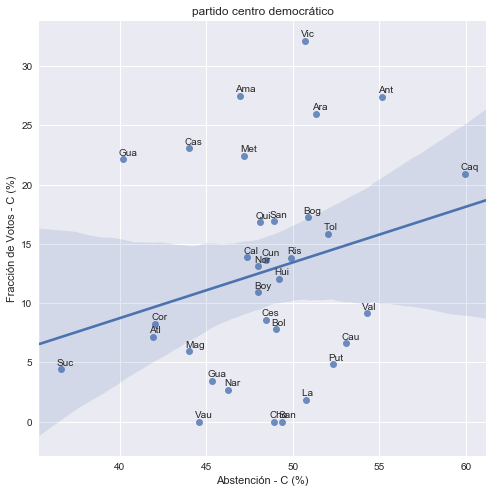

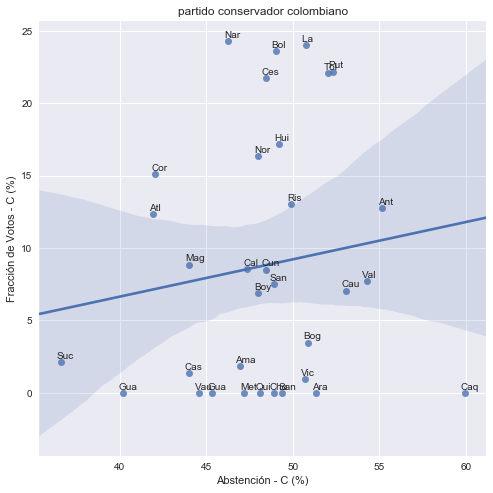

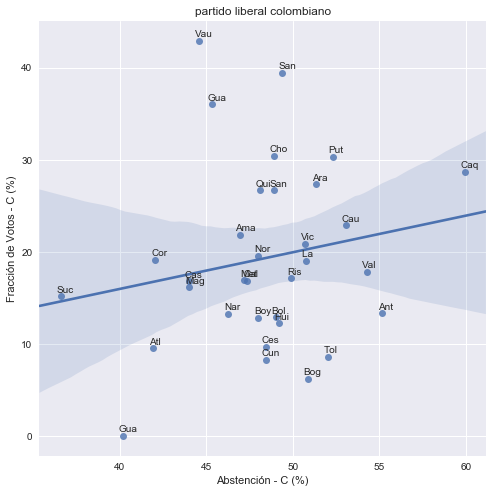

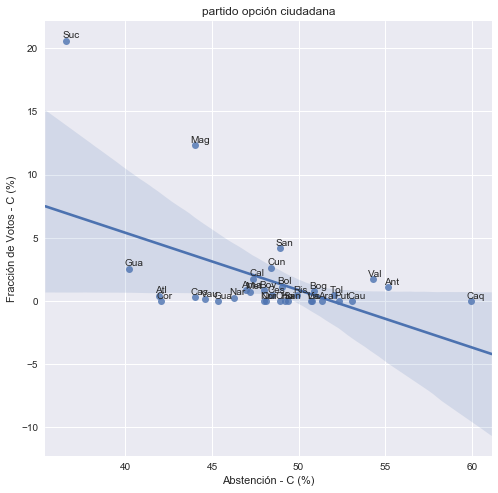

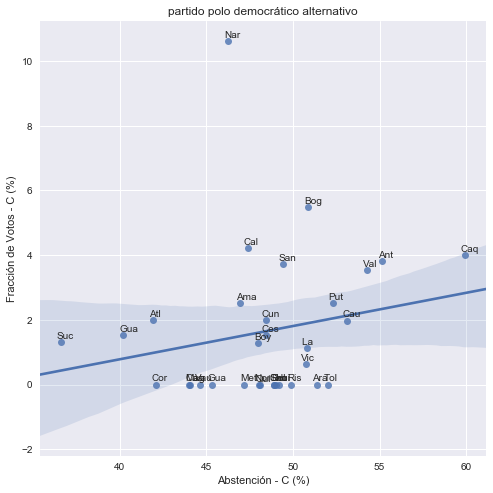

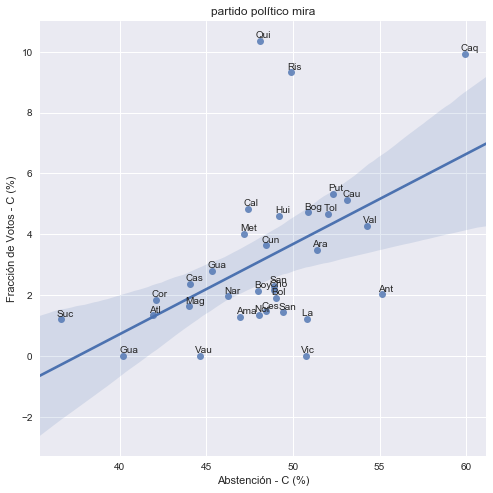

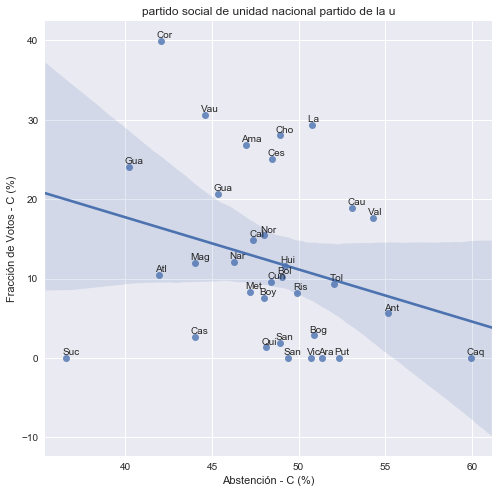

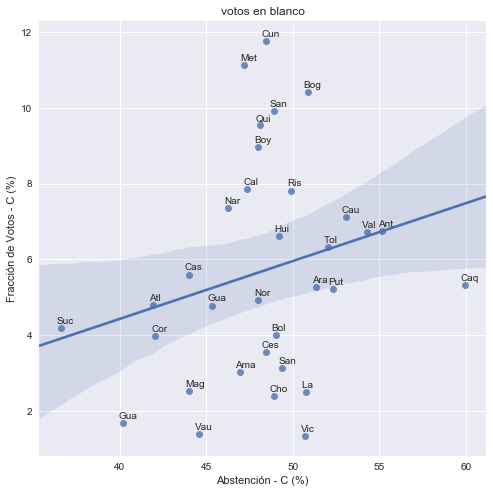

In [48]:
for k in np.unique(df2['Partido']):
    dfsel=df2[df2['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - C (%)',y='Fracción de Votos - C (%)',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - C (%)'].iloc[i]-0.25,dfsel['Fracción de Votos - C (%)'].iloc[i]+0.01*dfsel['Fracción de Votos - C (%)'].max(),txt[0:3])
    ax.set_title(k)